In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

In [2]:
images = []
target = []
img_size = 512
glaucoma_path = "./data/Cropped/glaucoma/"
normal_path = "./data/Cropped/normal/"

for file in os.listdir(glaucoma_path):
    image_path = glaucoma_path + file
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (img_size,img_size))
    images.append(img)
    target.append(1)

for file in os.listdir(normal_path):
    image_path = normal_path + file
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (img_size,img_size))
    images.append(img)
    target.append(0)

images = np.array(images).astype("float32")
images = images / 255.
target = np.array(target).astype("float32")

print(images.shape)
print(target.shape)

(650, 512, 512, 3)
(650,)


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, target, test_size=0.2, random_state=123, shuffle=True, stratify=target)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(520, 512, 512, 3)
(520,)
(130, 512, 512, 3)
(130,)


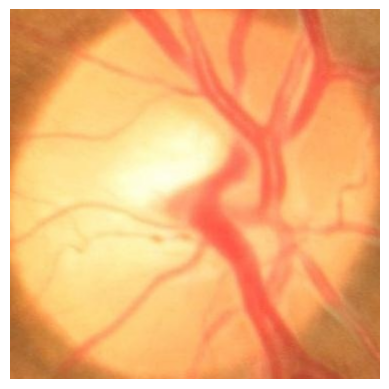

In [4]:
img = X_train[0]
plt.imshow(img)
plt.axis("off")
plt.show()

In [5]:
# Baseline accuracy: predict most frequent class for every instance
print(np.unique(y_train, return_counts=True))
np.mean(y_train == 0)

(array([0., 1.], dtype=float32), array([386, 134]))


np.float64(0.7423076923076923)

In [46]:
from keras.models import Sequential
from keras import Model
from keras.layers import InputLayer, Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout, Activation

In [42]:
def build_cnn():
    model = Sequential([
    InputLayer(input_shape=(512, 512, 3), name='input'),

    Conv2D(32, (3, 3), padding='same', name='conv1'),
    Activation('relu', name='relu1'),
    BatchNormalization(name='bn1'),

    Conv2D(32, (3, 3), padding='same', name='conv2'),
    Activation('relu', name='relu2'),
    BatchNormalization(name='bn2'),
    MaxPooling2D(pool_size=(2, 2), name='pool1'),

    Conv2D(64, (3, 3), padding='same', name='conv3'),
    Activation('relu', name='relu3'),
    BatchNormalization(name='bn3'),

    Conv2D(64, (3, 3), padding='same', name='conv4'),
    Activation('relu', name='relu4'),
    BatchNormalization(name='bn4'),
    MaxPooling2D(pool_size=(2, 2), name='pool2'),

    Conv2D(128, (3, 3), padding='same', name='conv5'),
    Activation('relu', name='relu5'),
    BatchNormalization(name='bn5'),

    Conv2D(128, (3, 3), padding='same', name='conv6'),
    Activation('relu', name='relu6'),
    BatchNormalization(name='bn6'),
    MaxPooling2D(pool_size=(2, 2), name='pool3'),

    Conv2D(256, (3, 3), padding='same', name='conv7'),
    Activation('relu', name='relu7'),
    BatchNormalization(name='bn7'),

    Conv2D(256, (3, 3), padding='same', name='conv8'),
    Activation('relu', name='relu8'),
    BatchNormalization(name='bn8'),
    MaxPooling2D(pool_size=(2, 2), name='pool4'),

    Conv2D(512, (3, 3), padding='same', name='conv9'),
    Activation('relu', name='relu9'),

    Conv2D(512, (3, 3), padding='same', name='conv10'),
    Activation('relu', name='relu10'),
    BatchNormalization(name='bn10'),
    MaxPooling2D(pool_size=(2, 2), name='pool5'),
    Dropout(0.5, name='dropout1'),

    Flatten(name='flatten'),

    Dense(1024, name='fc1'),
    Activation('relu', name='relu_fc1'),
    Dropout(0.5, name='dropout2'),

    Dense(1024, name='fc2'),
    Activation('relu', name='relu_fc2'),

    Dense(2, activation='softmax', name='output')
    ])

    return model

In [43]:
model1 = build_cnn()
model1.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

c:\Users\mathew\miniconda3\envs\ML\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [44]:
model1.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 512, 512, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu1 (Activation)              │ (None, 512, 512, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn1 (BatchNormalization)        │ (None, 512, 512, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 512, 512, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu2 (Activation)              │ (None, 512, 512, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn2 (BatchNormalization)        │ (None, 512, 512, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 256, 256, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 256, 256, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu3 (Activation)              │ (None, 256, 256, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn3 (BatchNormalization)        │ (None, 256, 256, 64)   │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv4 (Conv2D)                  │ (None, 256, 256, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu4 (Activation)              │ (None, 256, 256, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn4 (BatchNormalization)        │ (None, 256, 256, 64)   │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv5 (Conv2D)                  │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu5 (Activation)              │ (None, 128, 128, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn5 (BatchNormalization)        │ (None, 128, 128, 128)  │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv6 (Conv2D)                  │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu6 (Activation)              │ (None, 128, 128, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn6 (BatchNormalization)        │ (None, 128, 128, 128)  │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool3 (MaxPooling2D)            │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv7 (Conv2D)                  │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu7 (Activation)              │ (None, 64, 64, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn7 (BatchNormalization)        │ (None, 64, 64, 256)    │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv8 (Conv2D)                  │ (None, 64, 64, 256)    │       590,08

 Total params: 139,988,514 (534.01 MB)

 Trainable params: 139,985,570 (534.00 MB)

 Non-trainable params: 2,944 (11.50 KB)

In [41]:
history = model1.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=32)

Epoch 1/50


KeyboardInterrupt: 

In [48]:
feature_extractor = Model(inputs=model1.inputs, outputs=model1.get_layer("relu_fc2").output)
#train_features = feature_extractor.predict(X_train)
#test_features = feature_extractor.predict(X_test)

In [10]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

svm_clf = make_pipeline(StandardScaler(), SVC(kernel="linear"))
svm_clf.fit(train_features,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='linear'))])

In [11]:
from sklearn.metrics import accuracy_score
y_pred = svm_clf.predict(train_features)
print(f"Train Accuracy: {100*accuracy_score(y_train,y_pred):.2f}")
y_pred = svm_clf.predict(test_features)
print(f"Test Accuracy: {100*accuracy_score(y_pred,y_test):.2f}")

Train Accuracy: 59.99
Test Accuracy: 60.05
